<a href="https://colab.research.google.com/github/juniors719/dry_bean_classifier/blob/main/dry_bean_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install pandas matplotlib openpyxl

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_excel("https://github.com/juniors719/dry_bean_classifier/raw/refs/heads/main/DryBeanDataset/Dry_Bean_Dataset.xlsx")

In [4]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [6]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


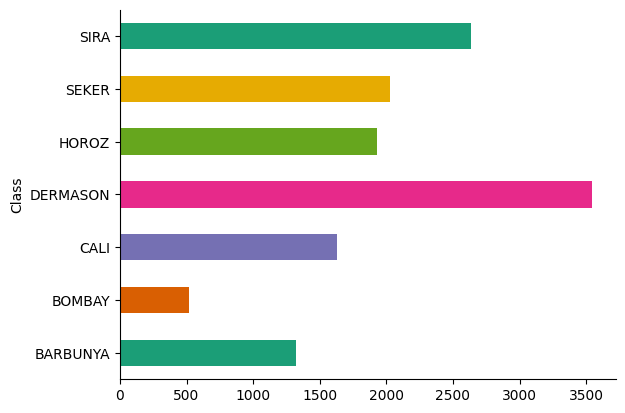

In [7]:
import seaborn as sns
df.groupby('Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

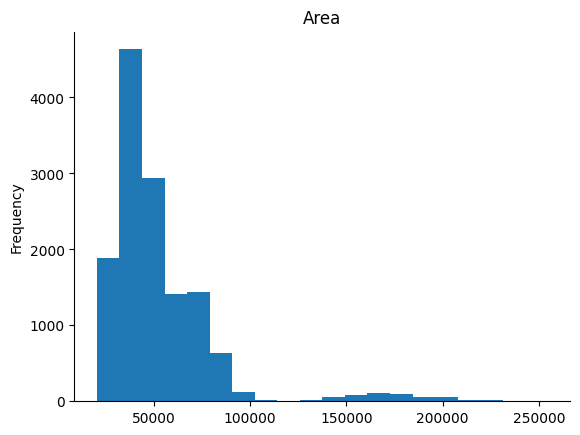

In [8]:
df['Area'].plot(kind='hist', bins=20, title='Area')
plt.gca().spines[['top', 'right',]].set_visible(False)

## O valor de X guardará os valores das features e o Y guardará os valores do target

In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

## Divisão do Df em conjunto de Treino e Teste para garantir que o o modelo seja treinado sem que o mesmo tenha conhecimento do conjunto de teste

In [10]:
X_train, y_train, X_test, y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## O conjunto de treino terá 80% das amostras, enquanto que o de teste terá somente 20%, além disso, garantimos a reprodutibilidade com "random_state" = 42.
## Além do mais, "stratify"=y garante que classes com pouca representatividade no Df possam ser balanceadas proporcionalmente

In [11]:
print("Adicionei esses print pra gente visualizar melhor")
print("\nDistribuição das classes no treino:")
print(y_train.value_counts(normalize=True))
print("\nDistribuição das classes no teste:")
print(y_test.value_counts(normalize=True))

Adicionei esses print pra gente visualizar melhor

Distribuição das classes no treino:
Area   Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  Eccentricity  ConvexArea  EquivDiameter  Extent    Solidity  roundness  Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4
54160  929.492    349.459450       202.934731       1.722029      0.814110      55623       262.599798     0.749505  0.973698  0.787766   0.751446     0.006452      0.001269      0.564671      0.972379        0.000734
56539  943.147    370.374563       196.675975       1.883171      0.847360      57599       268.305219     0.695728  0.981597  0.798729   0.724416     0.006551      0.001113      0.524778      0.988248        0.000734
45478  838.042    331.843270       176.276767       1.882513      0.847243      46206       240.633306     0.608011  0.984244  0.813729   0.725141     0.007297      0.001245      0.525830      0.989882        0.000734
54689  911.217    372.146327       187.816831       1

# TODO : FAZER O PRÉ PROCESSAMENTO DE DADOS